In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Github/ERA-v1/S6

/content/drive/MyDrive/Github/ERA-v1/S6


In [3]:
%ls

model.py  __pycache__/  S6.ipynb  utils.py


CODE BLOCK: 1

In [4]:
# del model
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from model import Net
from utils import train, test
import torch.nn.functional as F

CODE BLOCK: 2

In [5]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


In [6]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
       BatchNorm2d-2           [-1, 16, 26, 26]              32
            Conv2d-3           [-1, 32, 24, 24]           4,640
       BatchNorm2d-4           [-1, 32, 24, 24]              64
            Conv2d-5           [-1, 32, 10, 10]           9,248
       BatchNorm2d-6           [-1, 32, 10, 10]              64
            Conv2d-7             [-1, 32, 8, 8]           9,248
       BatchNorm2d-8             [-1, 32, 8, 8]              64
         AvgPool2d-9             [-1, 32, 1, 1]               0
           Linear-10                   [-1, 10]             330
Total params: 23,850
Trainable params: 23,850
Non-trainable params: 0
--------------------------------------------------------------

CODE BLOCK: 3

In [7]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [8]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

CODE BLOCK: 5

In [9]:
batch_size = 4092

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

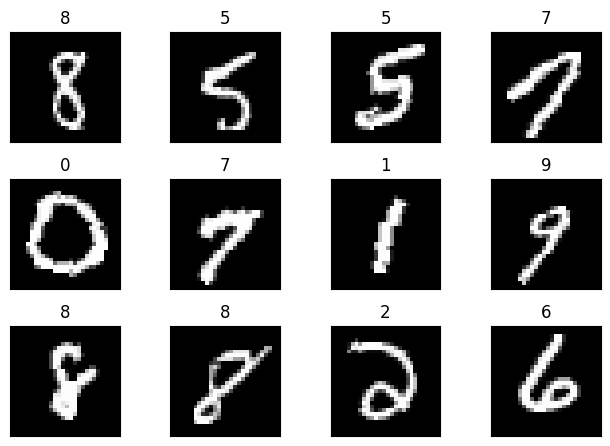

In [10]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 10

In [14]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc, train_losses = train(model, device, train_loader, optimizer, criterion)
  test_acc, test_losses = test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 1


Train: Loss=1.6773 Batch_id=14 Accuracy=34.19: 100%|██████████| 15/15 [00:21<00:00,  1.46s/it]


Test set: Average loss: 2.3927, Accuracy: 1136/10000 (11.36%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 2


Train: Loss=1.0504 Batch_id=14 Accuracy=65.56: 100%|██████████| 15/15 [00:21<00:00,  1.44s/it]


Test set: Average loss: 1.5375, Accuracy: 3761/10000 (37.61%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 3


Train: Loss=0.5042 Batch_id=14 Accuracy=85.97: 100%|██████████| 15/15 [00:22<00:00,  1.50s/it]


Test set: Average loss: 0.5821, Accuracy: 8714/10000 (87.14%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 4


Train: Loss=0.2941 Batch_id=14 Accuracy=92.64: 100%|██████████| 15/15 [00:21<00:00,  1.46s/it]


Test set: Average loss: 0.2087, Accuracy: 9583/10000 (95.83%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 5


Train: Loss=0.1962 Batch_id=14 Accuracy=94.95: 100%|██████████| 15/15 [00:20<00:00,  1.40s/it]


Test set: Average loss: 0.1594, Accuracy: 9665/10000 (96.65%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 6


Train: Loss=0.1490 Batch_id=14 Accuracy=95.96: 100%|██████████| 15/15 [00:21<00:00,  1.43s/it]


Test set: Average loss: 0.1111, Accuracy: 9775/10000 (97.75%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 7


Train: Loss=0.1362 Batch_id=14 Accuracy=96.69: 100%|██████████| 15/15 [00:23<00:00,  1.57s/it]


Test set: Average loss: 0.0858, Accuracy: 9812/10000 (98.12%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 8


Train: Loss=0.1085 Batch_id=14 Accuracy=97.00: 100%|██████████| 15/15 [00:22<00:00,  1.49s/it]


Test set: Average loss: 0.0756, Accuracy: 9822/10000 (98.22%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 9


Train: Loss=0.1042 Batch_id=14 Accuracy=97.41: 100%|██████████| 15/15 [00:21<00:00,  1.43s/it]


Test set: Average loss: 0.0672, Accuracy: 9843/10000 (98.43%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 10


Train: Loss=0.0830 Batch_id=14 Accuracy=97.60: 100%|██████████| 15/15 [00:21<00:00,  1.46s/it]


Test set: Average loss: 0.0616, Accuracy: 9850/10000 (98.50%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 11


Train: Loss=0.0930 Batch_id=14 Accuracy=97.71: 100%|██████████| 15/15 [00:22<00:00,  1.48s/it]


Test set: Average loss: 0.0587, Accuracy: 9843/10000 (98.43%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 12


Train: Loss=0.0788 Batch_id=14 Accuracy=97.92: 100%|██████████| 15/15 [00:22<00:00,  1.50s/it]


Test set: Average loss: 0.0563, Accuracy: 9858/10000 (98.58%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 13


Train: Loss=0.0813 Batch_id=14 Accuracy=98.02: 100%|██████████| 15/15 [00:22<00:00,  1.52s/it]


Test set: Average loss: 0.0504, Accuracy: 9877/10000 (98.77%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 14


Train: Loss=0.0736 Batch_id=14 Accuracy=98.15: 100%|██████████| 15/15 [00:21<00:00,  1.44s/it]


Test set: Average loss: 0.0561, Accuracy: 9833/10000 (98.33%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 15


Train: Loss=0.0678 Batch_id=14 Accuracy=98.24: 100%|██████████| 15/15 [00:21<00:00,  1.43s/it]


Test set: Average loss: 0.0454, Accuracy: 9872/10000 (98.72%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 16


Train: Loss=0.0609 Batch_id=14 Accuracy=98.33: 100%|██████████| 15/15 [00:22<00:00,  1.51s/it]


Test set: Average loss: 0.0402, Accuracy: 9891/10000 (98.91%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 17


Train: Loss=0.0548 Batch_id=14 Accuracy=98.39: 100%|██████████| 15/15 [00:23<00:00,  1.54s/it]


Test set: Average loss: 0.0397, Accuracy: 9894/10000 (98.94%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 18


Train: Loss=0.0732 Batch_id=14 Accuracy=98.36: 100%|██████████| 15/15 [00:24<00:00,  1.64s/it]


Test set: Average loss: 0.0405, Accuracy: 9887/10000 (98.87%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 19


Train: Loss=0.0567 Batch_id=14 Accuracy=98.38: 100%|██████████| 15/15 [00:23<00:00,  1.55s/it]


Test set: Average loss: 0.0392, Accuracy: 9894/10000 (98.94%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 20


Train: Loss=0.0567 Batch_id=14 Accuracy=98.38: 100%|██████████| 15/15 [00:21<00:00,  1.42s/it]


Test set: Average loss: 0.0391, Accuracy: 9893/10000 (98.93%)

Adjusting learning rate of group 0 to 5.0000e-03.


[]

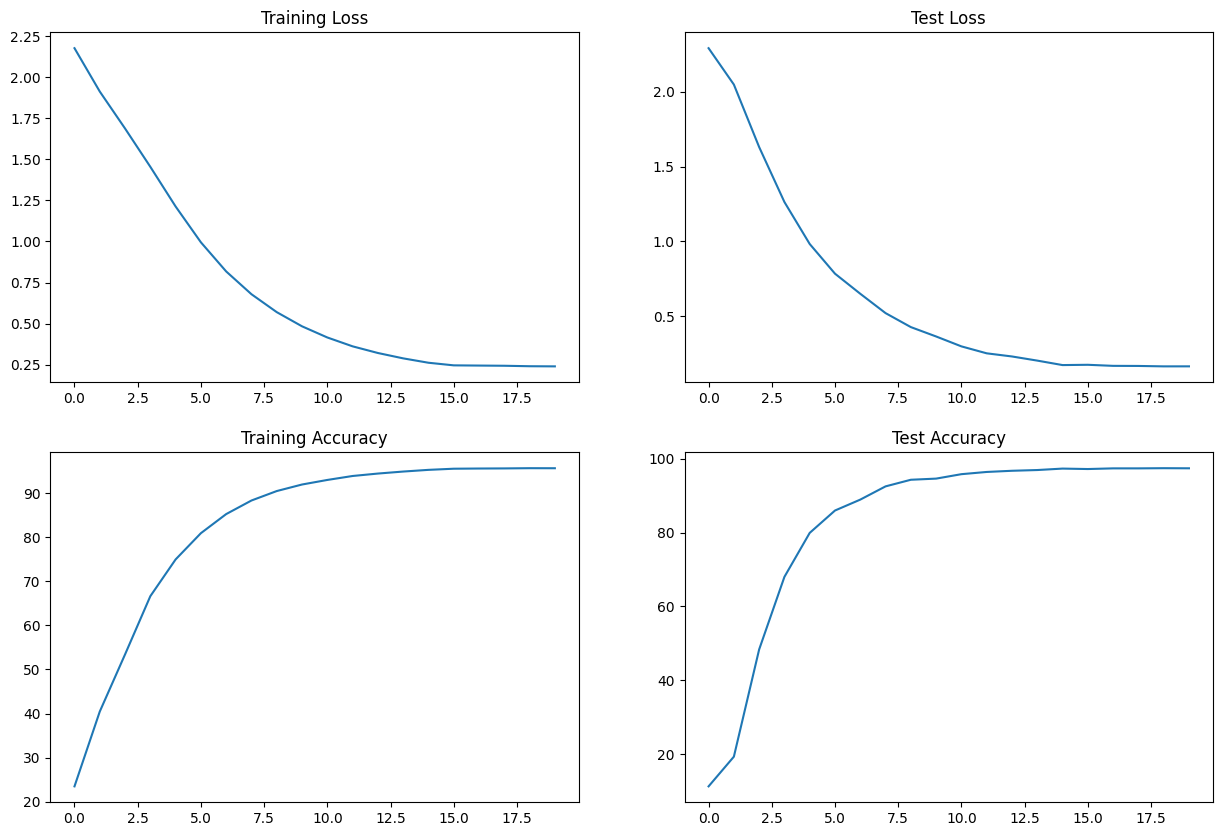

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")
plt.plot()